#Importar Base de datos y librerias principales

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/bank.csv', sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#Preprocesamiento de la base de datos

In [ ]:
# Elimina columnas que no serán útiles para el modelo
bank_data = df.drop(['contact', 'month'], axis=1)

In [ ]:
# Transforma características categóricas en variables numéricas utilizando one-hot encoding
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'])

# Transforma la variable objetivo 'y' en valores binarios 0 y 1
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})

#Entrenamiento del modelo de Arbol de decision

In [ ]:
from sklearn.model_selection import train_test_split

X = bank_data.drop('y', axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [ ]:
print("Número de instancias en X_train:", X_train.shape[0])
print("Número de instancias en y_train:", y_train.shape[0])
print("Número de instancias en X_test:", X_test.shape[0])
print("Número de instancias en y_test:", y_test.shape[0])


Número de instancias en X_train: 3164
Número de instancias en y_train: 3164
Número de instancias en X_test: 1357
Número de instancias en y_test: 1357


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")


Precisión del modelo: 0.8585114222549742


#Visualizacion de datos

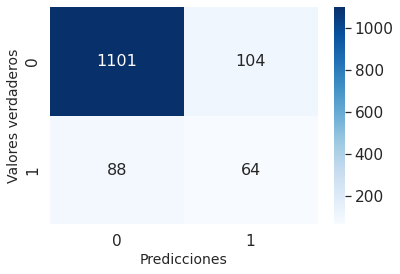

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') 
plt.xlabel('Predicciones', fontsize=14) 
plt.ylabel('Valores verdaderos', fontsize=14)
plt.show()


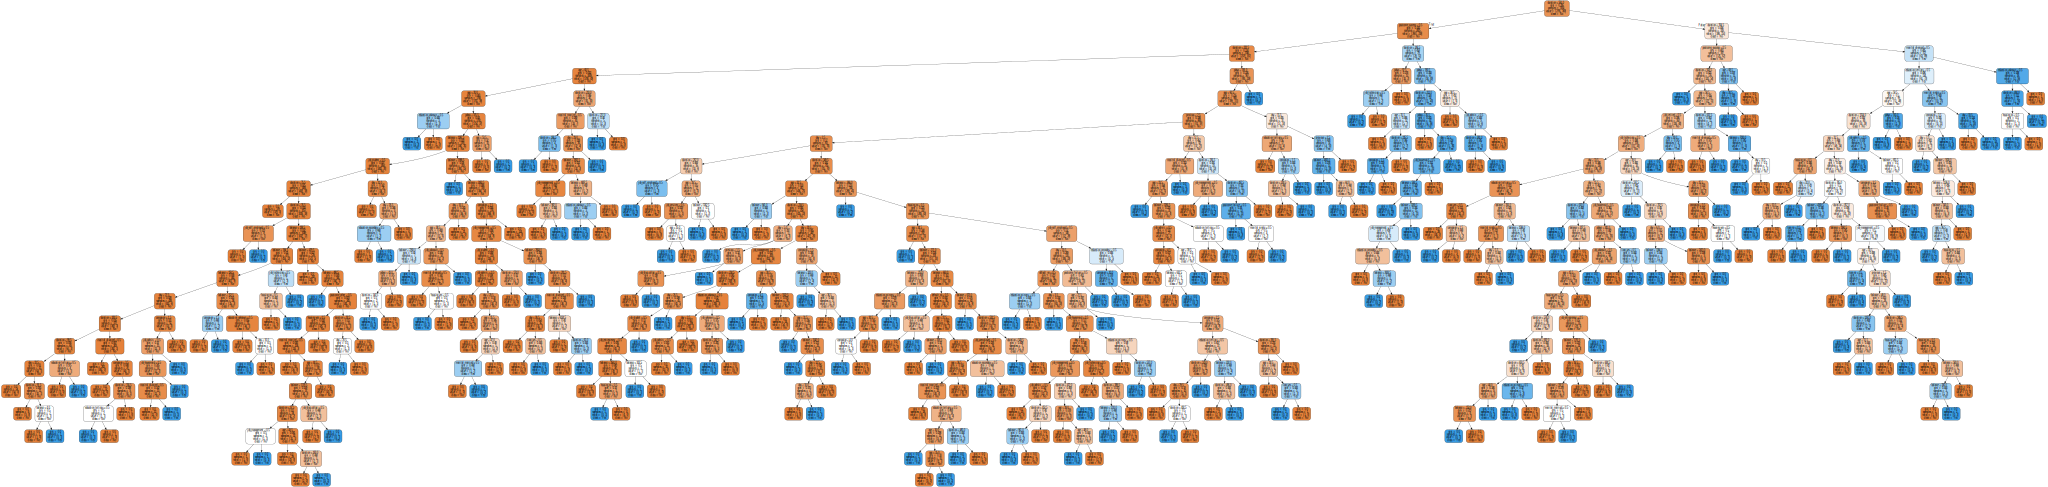

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['No', 'Yes'],  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("bank_tree") # guarda la imagen del árbol en un archivo PDF
graph # muestra el árbol en el notebook



#Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = bank_data.drop('y', axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear un modelo de Random Forest con 100 árboles
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones en los datos de prueba
y_pred = rf.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Calcular la matriz de confusión del modelo
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", confusion)

Precisión del modelo: 0.8968312453942521
Matriz de confusión:
 [[1178   27]
 [ 113   39]]


#Visualizar Datos de Random Forest

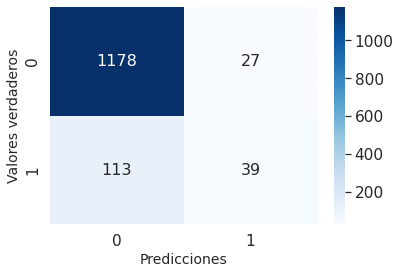

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') 
plt.xlabel('Predicciones', fontsize=14) 
plt.ylabel('Valores verdaderos', fontsize=14)
plt.show()


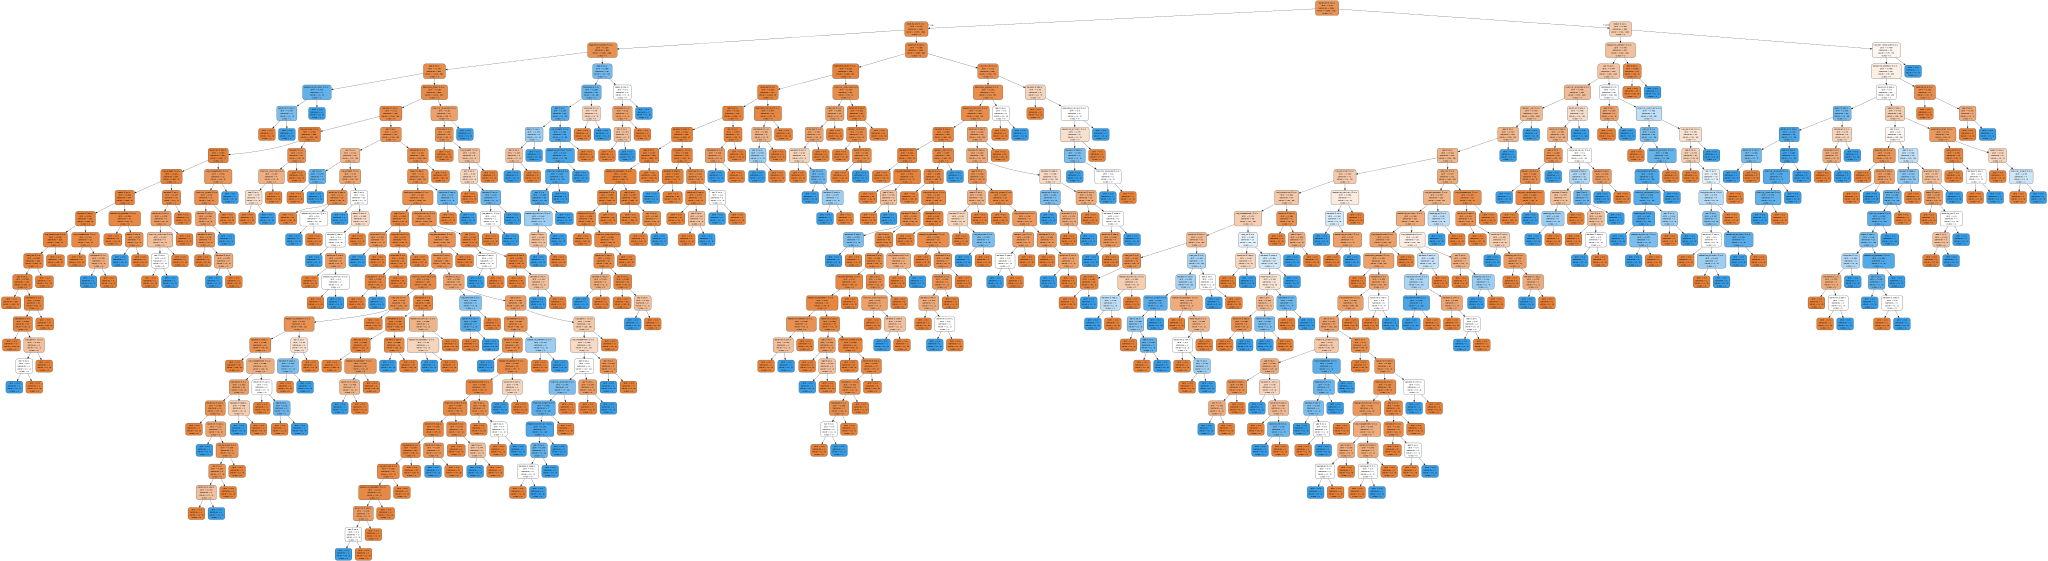

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(rf.estimators_[0], out_file=None, 
                           feature_names=X_train.columns, 
                           class_names = [str(c) for c in y_train.unique()], 
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("Random_Forest") # guarda la imagen del árbol en un archivo PDF
graph # muestra el árbol en el notebook

